In [2]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 30.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [torch]32m6/7 [torch]]


In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 MB 20.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.1 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [ultralytics] [ultralytics]n]


In [5]:
import requests
from PIL import Image
from io import BytesIO
import torch
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/Users/wooyongjung/Library/Application Support/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
import pandas as pd
import numpy as np

In [7]:
# Load the dataset
df = pd.read_csv('/Users/wooyongjung/WJ_Projects/HomelessStudy_EPJDS_2025/data/dc_mapillary_image_data.csv')
df.head()

,id,captured_at_ms,lon,lat,url
0,2882355252093912,1626350367569,-77.096391,38.995256,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...
1,142684247764408,1483041998481,-77.101482,38.993826,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...
2,193359302515367,1532813347403,-77.096193,38.993997,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...
3,370329794316939,1483042071447,-77.100098,38.993881,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...
4,449751629452177,1483042062508,-77.100259,38.993810,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...


In [8]:
df.shape

(10671790, 5)

In [11]:
df.drop_duplicates(subset=['url']).shape

(10671790, 5)

In [16]:
df['url'][9998]

'https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/An91CpfoCYH-Yd1T_hy1jx1eJgZ04AkfkQ4ztrpA9qW1ZbYIMl5a-RB0kaTDZ7hhpev6aNMSuz3nn4iqchbrVAWSp6jsqyym0kTuRre6ytec5QpaoCNYmXSEF2TibJkWdlbgKkEqd3gAWKBEw1F6Sg?stp=s2048x1536&edm=ALXxkZ8EAAAA&_nc_gid=N3aGLFYq4Znxmb0EnjCzYw&_nc_oc=AdnqMURu1DXUA_tY4246B3BfSApFbZyNaTdDfqS01RLs29KOgV079CNdc1IQKbS-u94&ccb=10-5&oh=00_AfSs5l7y9oO7R_YhVJVwsepOq8itPo1vOQ6HBFPj2Za95A&oe=689DF1FC&_nc_sid=201bca'

In [21]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [25]:
# Load DC Census Block Group shapefile
data_path = '/Users/wooyongjung/WJ_Projects/HomelessStudy_SanFrancisco_2024/data/tl_2021_11_bg/tl_2021_11_bg.shp'
census_bg = gpd.read_file(data_path)
census_bg = census_bg.to_crs(epsg=4326)
census_bg = census_bg[census_bg['GEOID'].str.startswith('11001')]
census_bg = census_bg[['GEOID', 'geometry']]


In [34]:
# Load DC Bounding Box data
df_bbox = pd.read_csv('/Users/wooyongjung/WJ_Projects/HomelessStudy_SanFrancisco_2024/data/DC_bbox/df_bbox_99.csv')
df_bbox.head()

,Unnamed: 0,row_num,col_num,swne_edges,center_latlon,center_lat,center_lon,GEOID
0,0,0,0,"(38.79004401168929, -77.12214000035773, 38.791...","(38.79078547660671, -77.12123558302413)",38.790785,-77.121236,510594203001
1,1,0,1,"(38.7900776409016, -77.12028819502156, 38.7915...","(38.790819092024, -77.11938375742014)",38.790819,-77.119384,510594203001
2,2,0,2,"(38.79011124079366, -77.11843638659438, 38.791...","(38.79085267812021, -77.11753192872636)",38.790853,-77.117532,510594203001
3,3,0,3,"(38.79014481136531, -77.11658457507889, 38.791...","(38.790886234895176, -77.11568009694551)",38.790886,-77.115680,510594203001
4,4,0,4,"(38.7901783526164, -77.11473276047779, 38.7916...","(38.790919762348764, -77.11382826208028)",38.790920,-77.113828,510594203001


In [35]:
# Select only the rows that match the GEOID for DC
df_bbox['GEOID'] = df_bbox['GEOID'].astype(str)
df_bbox = df_bbox[df_bbox['GEOID'].str.startswith('11001')]

# Reset index
df_bbox.reset_index(drop=True, inplace=True)

# Drop the first column Unnamed: 0
df_bbox.drop(columns=['Unnamed: 0'], inplace=True)

In [36]:
df_bbox.shape

(6833, 7)

In [37]:
# Create coordinates
df_bbox['swne_edges'] = df_bbox['swne_edges'].apply(lambda x: x[1:-1].split(','))
coords = []
for i in range(len(df_bbox)):
    coord = [(df_bbox['swne_edges'][i][1], df_bbox['swne_edges'][i][0]),
             (df_bbox['swne_edges'][i][3], df_bbox['swne_edges'][i][0]),
             (df_bbox['swne_edges'][i][3], df_bbox['swne_edges'][i][2]),
             (df_bbox['swne_edges'][i][1], df_bbox['swne_edges'][i][2])]
    coords.append(coord)

df_bbox['coords'] = coords

In [38]:
from shapely.geometry import Polygon, LineString, Point, MultiPolygon
# Apply Polygon to coords
df_bbox['geometry'] = df_bbox['coords'].apply(Polygon)

In [39]:
df_bbox.head()

,row_num,col_num,swne_edges,center_latlon,center_lat,center_lon,GEOID,coords,geometry
0,1,45,"[38.79297766582736, -77.03884704247784, 38.7...","(38.79371850978283, -77.03794169706438)",38.793719,-77.037942,110010109002,"[( -77.03884704247784, 38.79297766582736), ( -...",POLYGON ((-77.03884704247784 38.79297766582736...
1,2,45,"[38.79442703415638, -77.03888834960206, 38.7...","(38.79516787874482, -77.03798298694552)",38.795168,-77.037983,110010109002,"[( -77.03888834960206, 38.79442703415638), ( -...",POLYGON ((-77.03888834960206 38.79442703415638...
2,2,46,"[38.79445934713823, -77.037036332922, 38.795...","(38.795200177892994, -77.03613095004992)",38.795200,-77.036131,110010109002,"[( -77.037036332922, 38.79445934713823), ( -77...","POLYGON ((-77.037036332922 38.79445934713823, ..."
3,3,45,"[38.79587640208779, -77.03892965969936, 38.7...","(38.79661724730925, -77.0380242797985)",38.796617,-77.038024,110010109002,"[( -77.03892965969936, 38.79587640208779), ( -...",POLYGON ((-77.03892965969936 38.79587640208779...
4,3,46,"[38.79590871673287, -77.03707760555871, 38.7...","(38.79664954811994, -77.03617220544085)",38.796650,-77.036172,110010109002,"[( -77.03707760555871, 38.79590871673287), ( -...",POLYGON ((-77.03707760555871 38.79590871673287...


In [42]:
# Convert geometry to GeoDataFrame
df_bbox = gpd.GeoDataFrame(df_bbox, geometry=df_bbox['geometry'], crs=4326)

In [44]:
# Save the GeoDataFrame to a shapefile
df_bbox.to_file('data/df_bbox.shp', driver='ESRI Shapefile')

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_75880/3074419108.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df_bbox.to_file('data/df_bbox.shp', driver='ESRI Shapefile')
/Users/wooyongjung/miniconda3/envs/homeless_env/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'center_latlon' to 'center_lat'
  ogr_write(
/Users/wooyongjung/miniconda3/envs/homeless_env/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'center_lat' to 'center_l_1'
  ogr_write(


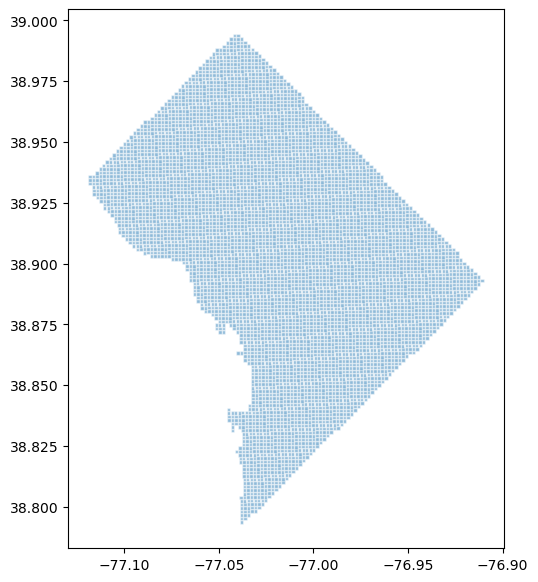

In [45]:
ax = df_bbox.plot(figsize=(7, 7), alpha=0.5, edgecolor='white')
plt.show()

In [26]:
census_bg.reset_index(drop=True, inplace=True)
census_bg.head()

,GEOID,geometry
0,110010007022,"POLYGON ((-77.07705 38.92567, -77.07705 38.925..."
1,110010006003,"POLYGON ((-77.07265 38.93187, -77.07255 38.932..."
2,110010006004,"POLYGON ((-77.07651 38.94222, -77.07601 38.942..."
3,110010011001,"POLYGON ((-77.08202 38.96148, -77.08202 38.962..."
4,110010004002,"POLYGON ((-77.07291 38.92254, -77.07269 38.922..."


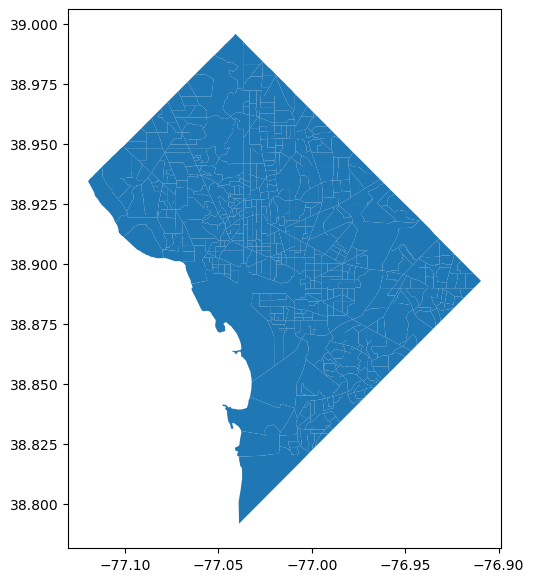

In [27]:
census_bg.plot(figsize=(7, 7))
plt.show()

In [46]:
df.head()

,id,captured_at_ms,lon,lat,url
0,2882355252093912,1626350367569,-77.096391,38.995256,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...
1,142684247764408,1483041998481,-77.101482,38.993826,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...
2,193359302515367,1532813347403,-77.096193,38.993997,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...
3,370329794316939,1483042071447,-77.100098,38.993881,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...
4,449751629452177,1483042062508,-77.100259,38.993810,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...


In [47]:
df.shape

(10671790, 5)

In [48]:
df_bbox.head(2)

,row_num,col_num,swne_edges,center_latlon,center_lat,center_lon,GEOID,coords,geometry
0,1,45,"[38.79297766582736, -77.03884704247784, 38.7...","(38.79371850978283, -77.03794169706438)",38.793719,-77.037942,110010109002,"[( -77.03884704247784, 38.79297766582736), ( -...","POLYGON ((-77.03885 38.79298, -77.03704 38.792..."
1,2,45,"[38.79442703415638, -77.03888834960206, 38.7...","(38.79516787874482, -77.03798298694552)",38.795168,-77.037983,110010109002,"[( -77.03888834960206, 38.79442703415638), ( -...","POLYGON ((-77.03889 38.79443, -77.03708 38.794..."


In [49]:
print(df_bbox.shape)
print(df.shape)

(6833, 9)
(10671790, 5)


In [ ]:
# Geojoin the main data (df) and df_bbox based on the geometry and filter out the df rows not in the bbox
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['lon'], df['lat']), crs=4326)
df_url = df.copy()
df_bbox = df_bbox.to_crs(epsg=4326)
df_bbox = df_bbox[['GEOID', 'geometry', 'center_latlon']]
df_url = gpd.sjoin(df_bbox, df_url, how='left', predicate='intersects')
df_url.shape

(9689045, 9)

In [61]:
df_url['geometry'].nunique()

6833

In [64]:
df_url.groupby(['geometry']).size().reset_index(name='count').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6833 entries, 0 to 6832
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  6833 non-null   geometry
 1   count     6833 non-null   int64   
dtypes: geometry(1), int64(1)
memory usage: 106.9 KB


In [ ]:
#df_url.plot(figsize=(7, 7), alpha=0.5, edgecolor='white')

In [62]:
df_url.head()

,GEOID,geometry,center_latlon,index_right,id,captured_at_ms,lon,lat,url
0,110010109002,"POLYGON ((-77.03885 38.79298, -77.03704 38.792...","(38.79371850978283, -77.03794169706438)",431277.0,1.834270e+14,1.531499e+12,-77.038751,38.792978,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...
0,110010109002,"POLYGON ((-77.03885 38.79298, -77.03704 38.792...","(38.79371850978283, -77.03794169706438)",419522.0,1.464670e+14,1.531499e+12,-77.038836,38.792978,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...
0,110010109002,"POLYGON ((-77.03885 38.79298, -77.03704 38.792...","(38.79371850978283, -77.03794169706438)",429638.0,3.636985e+15,1.544907e+12,-77.038343,38.792978,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...
0,110010109002,"POLYGON ((-77.03885 38.79298, -77.03704 38.792...","(38.79371850978283, -77.03794169706438)",422649.0,1.857431e+14,1.544907e+12,-77.038273,38.792978,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...
0,110010109002,"POLYGON ((-77.03885 38.79298, -77.03704 38.792...","(38.79371850978283, -77.03794169706438)",416683.0,2.782087e+15,1.544907e+12,-77.038386,38.792978,https://scontent-iad3-1.xx.fbcdn.net/m1/v/t6/A...


In [56]:
df_url.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 9689045 entries, 0 to 6832
Data columns (total 9 columns):
 #   Column          Dtype   
---  ------          -----   
 0   GEOID           object  
 1   geometry        geometry
 2   center_latlon   object  
 3   index_right     float64 
 4   id              float64 
 5   captured_at_ms  float64 
 6   lon             float64 
 7   lat             float64 
 8   url             object  
dtypes: float64(5), geometry(1), object(3)
memory usage: 739.2+ MB


<Axes: >

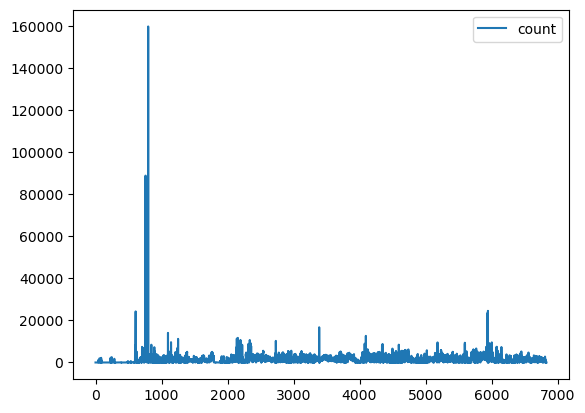

In [52]:
df_url.groupby('geometry').size().reset_index(name='count').plot()